In [1]:

import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random 


In [2]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\charan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.


True

In [8]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
print('number of +ve tweets : ', len(all_positive_tweets))
print('number of -ve tweets : ', len(all_negative_tweets))

number of +ve tweets :  5000
number of -ve tweets :  5000


In [12]:
print(type(all_negative_tweets))
print(type(all_negative_tweets[0]))

<class 'list'>
<class 'str'>


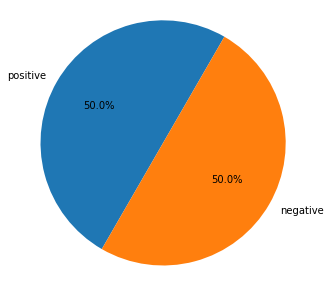

In [15]:
fig = plt.figure(figsize=(5,5))
labels = 'positive', 'negative'
sizes = [len(all_negative_tweets), len(all_negative_tweets)]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=60)

plt.axis('equal')
plt.show()

In [23]:
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])


@himma85 We are in process of listing this feature mostly for all the cinema's. :)
@halfmoonhalsey aw babe :((


In [24]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\charan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
tweet = all_positive_tweets[1425]
print(tweet)

Had an absolutely amazing time in Kenya! It was a emotional roller coaster but an experience I'm glad I had :) http://t.co/EPsQflEctx


In [45]:
import re
import string 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [46]:
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

Had an absolutely amazing time in Kenya! It was a emotional roller coaster but an experience I'm glad I had :) http://t.co/EPsQflEctx

Had an absolutely amazing time in Kenya! It was a emotional roller coaster but an experience I'm glad I had :) 


In [47]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len = True)

tweet_tokens = tokenizer.tokenize(tweet2)
print()
print('Tokwnized String : ')
print(tweet_tokens)


Had an absolutely amazing time in Kenya! It was a emotional roller coaster but an experience I'm glad I had :) 


Tokwnized String : 
['had', 'an', 'absolutely', 'amazing', 'time', 'in', 'kenya', '!', 'it', 'was', 'a', 'emotional', 'roller', 'coaster', 'but', 'an', 'experience', "i'm", 'glad', 'i', 'had', ':)']


In [48]:
stopwords_english = stopwords.words('english') 

print('Stop words :\n')
print(stopwords_english)

print('\nPunctuation :\n')
print(string.punctuation)

Stop words :

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', '

In [49]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens:
    if (word not in stopwords_english and
        word not in string.punctuation):
        tweets_clean.append(word)
print('removed stop words and punctuation:')
print(tweets_clean)




['had', 'an', 'absolutely', 'amazing', 'time', 'in', 'kenya', '!', 'it', 'was', 'a', 'emotional', 'roller', 'coaster', 'but', 'an', 'experience', "i'm", 'glad', 'i', 'had', ':)']

removed stop words and punctuation:
['absolutely', 'amazing', 'time', 'kenya', 'emotional', 'roller', 'coaster', 'experience', "i'm", 'glad', ':)']


In [50]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

stemmer = PorterStemmer()
tweets_stem = []

for word in tweets_clean:
    stem_word = stemmer.stem(word)
    tweets_stem.append(stem_word)

print('stemmed_words : ')
print(tweets_stem)




['absolutely', 'amazing', 'time', 'kenya', 'emotional', 'roller', 'coaster', 'experience', "i'm", 'glad', ':)']

stemmed_words : 
['absolut', 'amaz', 'time', 'kenya', 'emot', 'roller', 'coaster', 'experi', "i'm", 'glad', ':)']


In [53]:
from utils import process_tweet
print()
print('\033[92m')
print(tweet)
print('\033[94m')

tweets_stem = process_tweet(tweet)
print(tweets_stem)

ImportError: cannot import name 'process_tweet' from 'utils' (C:\Users\charan\AppData\Local\Programs\Python\Python38\lib\site-packages\utils\__init__.py)